# DiscreteLab №2: Huffman, LZW and LZ77
### Held by: Eugene Bevz and Tymofii Shevchenko

In [77]:
import time
import matplotlib.pyplot as plt

## Huffman algorithm - So many 0s and 1s (Eugene Bevz)

Here we studied the Huffman algorithm for encoding and decoding messages, which we use for encryption (convert letters or any other symbols into __0__ and __1__) and decryption. The main idea is built on generating a Huffman coding tree, which allow us to encode letters in a message according to a chance of its occurrence in message.

In [78]:
def read_file(filename: str) -> str:
    """
    Read file with message and return list of lines
    which will be encoded with Huffman algorithm. For now,
    we will assume that message consists of one line.

    :param filename: file with text to open
    :return: list of message lines
    """
    with open(filename, "r") as file:
        return file.read()

print(read_file("huffman_message_short.txt"))
print("-------------------------------------------------------------------")
print(read_file("huffman_message_medium.txt"))
print("-------------------------------------------------------------------")
print(read_file("huffman_message_long.txt"))

The steadfast love of the Lord never ceases; his mercies never come to an end; they are new every morning; great is your faithfulness.
-------------------------------------------------------------------
So we do not lose heart. Though our outer self is wasting away, our inner self is being renewed day by day. For this light momentary affliction is preparing for us an eternal weight of glory beyond all comparison, as we look not to the things that are seen but to the things that are unseen. For the things that are seen are transient, but the things that are unseen are eternal.
-------------------------------------------------------------------
1 The words of king Lemuel, the prophecy that his amother taught him.

2 What, my son? and what, the son of my womb? and what, the son of my vows?

3 Give not thy strength unto awomen, nor thy ways to that which destroyeth kings.

4 It is not for kings, O Lemuel, it is not for kings to drink awine; nor for princes strong drink:

5 Lest they drink,

## Count symbols
When we open the txt-file with content we want to encode, we read it entirely and return something like a solid string. That is because we plan to iterate over it from the very beginning to the very end and calculate the frequency of every possible symbol in the text, including spaces and punctuation marks (full stops, commas, etc).

We wrote `count_symbols()` to calculate the number of every possible symbol in text, so we can encode it later. If the text to be encoded is pretty short, we can allow ourselves rounding percentages, allowing slight error to appear. However, if the text is large, we don't use rounding, for 0.0000...001 might have a great difference.
There is no great magic in building percentages, as all we need is iterate over given string and update the dictionary by adding 1 to key value accordingly.

In [79]:
def count_symbols(message_to_encode: str) -> dict:
    """
    Count every symbol in text and return a dictionary
    that will represent the frequency of every
    symbol, including spaces and punctuation.

    :param message_to_encode: a message to be encoded; generally it's the whole file in one string
    :return: dictionary (e.g. {"A": 0.25, "B": 0.17, ...})
    """

    total_length = len(message_to_encode)
    symbol_percentage = {}

    # Generate a dictionary, that contains number of every symbol
    for symbol in message_to_encode:
        if symbol not in symbol_percentage:
            symbol_percentage[symbol] = 1
        else:
            symbol_percentage[symbol] += 1

    # Regenerate dictionary, changing values to floats
    # that represent the chance of the symbol to appear in text
    # Note: because we round the division results, tha accuracy may be slightly reduced
    for key, value in symbol_percentage.items():
        symbol_percentage[key] = value / total_length

    return symbol_percentage

print("----------------------------------------------------")
print(count_symbols("Message to encode"))
print("----------------------------------------------------")

----------------------------------------------------
{'M': 0.058823529411764705, 'e': 0.23529411764705882, 's': 0.11764705882352941, 'a': 0.058823529411764705, 'g': 0.058823529411764705, ' ': 0.11764705882352941, 't': 0.058823529411764705, 'o': 0.11764705882352941, 'n': 0.058823529411764705, 'c': 0.058823529411764705, 'd': 0.058823529411764705}
----------------------------------------------------


In [80]:
print("----------------------------------------------------")
print(count_symbols("Очевидним та найбільш поширеним використанням теорії кодування є стиснення інформації."))
print("----------------------------------------------------")

----------------------------------------------------
{'О': 0.011627906976744186, 'ч': 0.011627906976744186, 'е': 0.046511627906976744, 'в': 0.03488372093023256, 'и': 0.08139534883720931, 'д': 0.023255813953488372, 'н': 0.12790697674418605, 'м': 0.046511627906976744, ' ': 0.10465116279069768, 'т': 0.046511627906976744, 'а': 0.05813953488372093, 'й': 0.011627906976744186, 'б': 0.011627906976744186, 'і': 0.046511627906976744, 'л': 0.011627906976744186, 'ь': 0.011627906976744186, 'ш': 0.023255813953488372, 'п': 0.011627906976744186, 'о': 0.05813953488372093, 'р': 0.046511627906976744, 'к': 0.023255813953488372, 'с': 0.03488372093023256, 'я': 0.03488372093023256, 'ї': 0.023255813953488372, 'у': 0.011627906976744186, 'є': 0.011627906976744186, 'ф': 0.011627906976744186, 'ц': 0.011627906976744186, '.': 0.011627906976744186}
----------------------------------------------------


In [81]:
print("----------------------------------------------------")
print(count_symbols("Очевидним та найбільш поширеним використанням теорії кодування є стиснення інформації. У цій лабораторній роботі вам пропонується імплементувати алгоритми кодування, що раніше були state-of-art technique, а зараз є джерелом ідей для створення нових алгоритмів. Втім, багато з цих алгоритмів використовуються сьогодні: для прикладу, утиліта для стиснення gzip, що де-факто є стандартом у ряді UNIX-based системах, базується на використанні алгоритму Deflate, що в свою чергу є поєднанням LZ77 та кодування методом Гаффмана."))
print("----------------------------------------------------")

----------------------------------------------------
{'О': 0.0019157088122605363, 'ч': 0.0038314176245210726, 'е': 0.03065134099616858, 'в': 0.03065134099616858, 'и': 0.04597701149425287, 'д': 0.03065134099616858, 'н': 0.06513409961685823, 'м': 0.03639846743295019, ' ': 0.13218390804597702, 'т': 0.05555555555555555, 'а': 0.06704980842911877, 'й': 0.007662835249042145, 'б': 0.011494252873563218, 'і': 0.032567049808429116, 'л': 0.02681992337164751, 'ь': 0.009578544061302681, 'ш': 0.005747126436781609, 'п': 0.011494252873563218, 'о': 0.06704980842911877, 'р': 0.0421455938697318, 'к': 0.01532567049808429, 'с': 0.03065134099616858, 'я': 0.028735632183908046, 'ї': 0.0038314176245210726, 'у': 0.02490421455938697, 'є': 0.013409961685823755, 'ф': 0.007662835249042145, 'ц': 0.005747126436781609, '.': 0.005747126436781609, 'У': 0.0019157088122605363, 'г': 0.013409961685823755, ',': 0.013409961685823755, 'щ': 0.005747126436781609, 's': 0.0038314176245210726, 't': 0.009578544061302681, 'a': 0.00766

## Coding tree
After calculating percentages for every symbol in text, we can start building a coding tree which will be used for encoding. Huffman coding tree is built via adding the least two values of probability over and over again until we reach 1 in sum. Every left branch has 0 assigned to it and every right branch has 1 assigned to it.
In `HuffmanTree` class we create nodes and branches to generate a coding tree in `build_huffman_tree`. The class also has methods `encode` and `decode` which will encode/decode provided text based on the coding tree we generated earlier.

### encode
The `encode` method is responsible for generating code for every symbol based on its position in the coding tree. Left branch gives 0, right branch gives 1. Encoding runs over `HuffmanTree` graph from down to up and takes two children of the node and gives digits as mentioned before. After assigning digits, `encode` generates a dictionary with encoding. Then recursion comes and the process repeats until you can iterate again no more.

### decode
The `decode` requires _code_dict_ from `encode` in order to get the original text. The method iterates over 0s and 1s in the encoded message and adds them to some empty string. If we receive a pattern from _code_dict_, than we replace it with corresponding key. The decoded symbols are added to another string, which will be returned in the very end.

In [82]:
class HuffmanTree:
    """
    Huffman algorythm for encoding messages and
    decoding messages.
    """

    def __init__(self, left_branch=None, right_branch=None):
        self.left_branch = left_branch
        self.right_branch = right_branch

    def child_nodes(self):
        """
        Returns children of the current node

        :return: left and right children
        """
        return self.left_branch, self.right_branch

    def __str__(self):
        return self.left_branch, self.right_branch

    def encode(self, node, b_str='') -> dict:
        """
        Encode the alphabet, using Huffman algorithm.
        Generates a code for each symbol and replaces
        every character with it.

        :param node: a node to be encoded
        :param b_str: a string that will end up being a code for symbol
        :return: an encoded message
        """
        if type(node) is str:
            return {node: b_str}
        (left, right) = node.child_nodes()
        node_dict = dict()
        node_dict.update(self.encode(left, b_str+"0"))
        node_dict.update(self.encode(right, b_str+"1"))
        return node_dict

    def decode(self, message: str, scrypt: dict) -> str:
        """
        Decode message encoded with Huffman algorithm. It adds digits and finds the pattern
        in given dictionary. If found - replace with a corresponding key.

        :param message: encoded message to decode
        :param scrypt: a dictionary {symbol: code}
        :return: a decoded message
        """
        current_code = ""
        decoded_text = ""

        for digit in message:
            current_code += digit
            if current_code in scrypt.values():
                # find the symbol corresponding to the current code
                for symbol, code in scrypt.items():
                    if code == current_code:
                        decoded_text += symbol
                        current_code = ""
                        break
        return decoded_text


The `build_huffman_tree` function is responsible for generating a coding tree. As we have counted the probabilities of symbols in text, we create a list with this data, so we can sort them in descending order and operate with every two least values probabilities, as Huffman algorithm says. In the very end, we will receive a single object, so we use indexing to retrieve it. We replace last two nodes with a sum of their probabilities and repeat so until we reach a full graph (a complete __HuffmanTree__ object). This tree will be used to generate code for symbols and encode the message.

In [83]:
def build_huffman_tree(nodes: list) -> HuffmanTree:
    """
    This function builds a Huffman tree based on
    incoming data about symbols in text. Either
    symbol count or percentage is valid.
    The function will return a HuffmanTree object with
    data about nodes and their children.

    :param nodes: list of tuples of nodes and their number (here -- percentage)
    :return: HuffmanTree object
    """
    while len(nodes) > 1:
        (symbol_1, probability_1) = nodes[-1]
        (symbol_2, probability_2) = nodes[-2]
        nodes = nodes[:-2]
        node = HuffmanTree(symbol_1, symbol_2)
        nodes.append((node, probability_1 + probability_2))
        nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
    return nodes[0][0]

## Write file
I believe you don't need to be explained how writing files works. As we received the coding dictionary, we can finally encode the message itself.
We create an empty string in order not to mess up with the original one, and then iterate

In [84]:
def write_file(write_to: str, write_the: str, scrypt: dict) -> None:
    """
    Write an encoded file according to the Huffman code.

    :param write_to: destination to output file
    :param write_the: data to write
    :param scrypt: dictionary of symbols and their percentages: values show
    how often symbol appears in text.
    """
    with open(write_to, 'w') as encoded_file:
        for line in write_the:
            encoded = ""
            for symbol in line:
                if symbol in scrypt:
                    encoded += scrypt[symbol]
            encoded_file.write(encoded)

# Analysis

Now let's take a look at what we've got.

## Analise counting
As we can see, the shorter message, the more stable calculating is. In some cases there are some deviations, but the majority remains on one specific level.

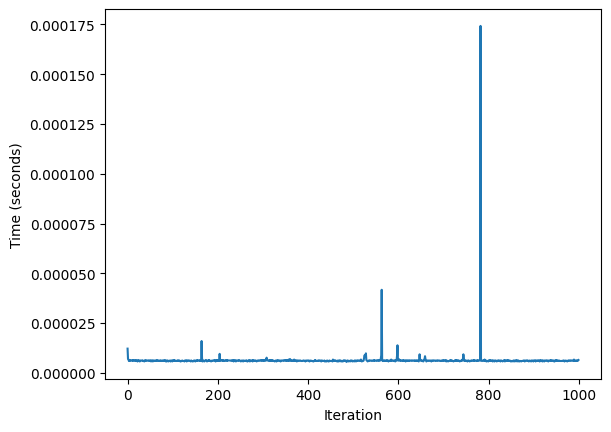

In [85]:
message_short = read_file("huffman_message_short.txt")

timings = []

for i in range(1000):
    start = time.time()
    count_symbols(message_short)
    stop = time.time()
    timings.append(stop - start)

plt.plot(timings)
plt.ylabel('Time (seconds)')
plt.xlabel('Iteration')
plt.show()

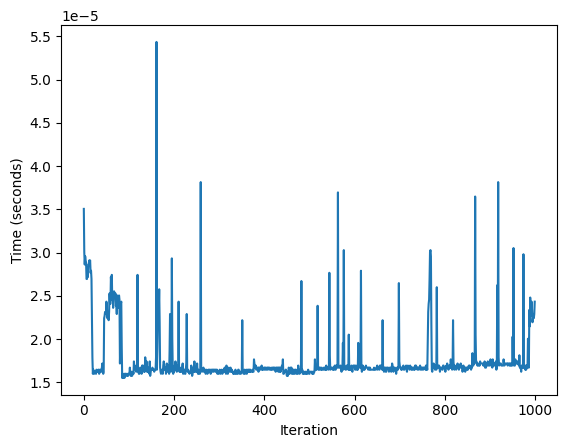

In [86]:
message_medium = read_file("huffman_message_medium.txt")

timings = []

for i in range(1000):
    start = time.time()
    count_symbols(message_medium)
    stop = time.time()
    timings.append(stop - start)

plt.plot(timings)
plt.ylabel('Time (seconds)')
plt.xlabel('Iteration')
plt.show()

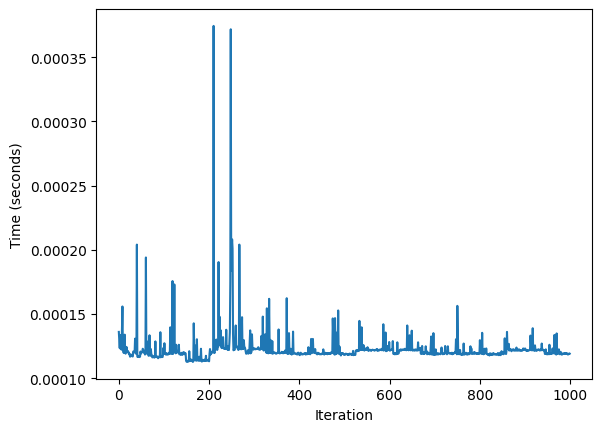

In [87]:
message_long = read_file("huffman_message_long.txt")

timings = []

for i in range(1000):
    start = time.time()
    count_symbols(message_long)
    stop = time.time()
    timings.append(stop - start)

plt.plot(timings)
plt.ylabel('Time (seconds)')
plt.xlabel('Iteration')
plt.show()

## Analise encoding


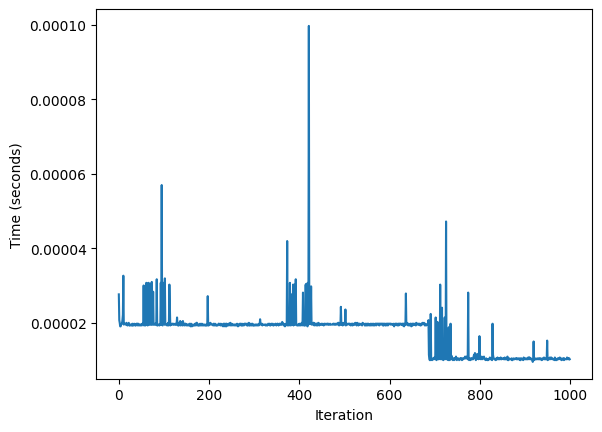

In [88]:
message_short = read_file("huffman_message_short.txt")
message_medium = read_file("huffman_message_medium.txt")
message_long = read_file("huffman_message_long.txt")

short_symbol_percentages = sorted(count_symbols(message_short).items(), key=lambda x: x[1], reverse=True)
medium_symbol_percentages = sorted(count_symbols(message_medium).items(), key=lambda x: x[1], reverse=True)
long_symbol_percentages = sorted(count_symbols(message_long).items(), key=lambda x: x[1], reverse=True)

huffman_tree_small = build_huffman_tree(short_symbol_percentages)
huffman_tree_medium = build_huffman_tree(medium_symbol_percentages)
huffman_tree_large = build_huffman_tree(long_symbol_percentages)

tree = HuffmanTree()

small_code_dict = tree.encode(huffman_tree_small)
medium_code_dict = tree.encode(huffman_tree_medium)
large_code_dict = tree.encode(huffman_tree_large)

write_file("encoded_short", message_short, small_code_dict)
write_file("encoded_medium", message_medium, medium_code_dict)
write_file("encoded_long", message_long, large_code_dict)

short_message_to_decode = read_file("encoded_short")
medium_message_to_decode = read_file("encoded_medium")
long_message_to_decode = read_file("encoded_long")

timings = []

for i in range(1000):
    start = time.time()
    tree.encode(huffman_tree_small)
    stop = time.time()
    timings.append(stop - start)

plt.plot(timings)
plt.ylabel('Time (seconds)')
plt.xlabel('Iteration')
plt.show()

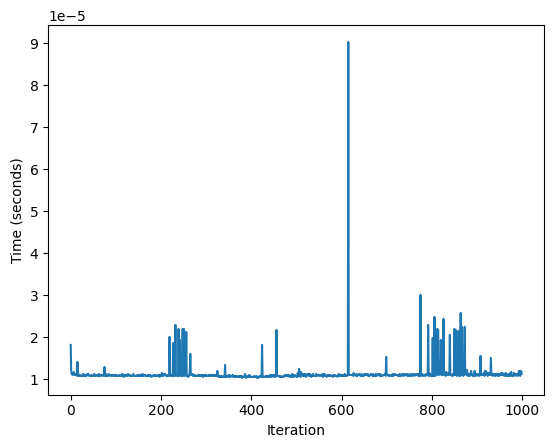

In [89]:
message_short = read_file("huffman_message_short.txt")
message_medium = read_file("huffman_message_medium.txt")
message_long = read_file("huffman_message_long.txt")

short_symbol_percentages = sorted(count_symbols(message_short).items(), key=lambda x: x[1], reverse=True)
medium_symbol_percentages = sorted(count_symbols(message_medium).items(), key=lambda x: x[1], reverse=True)
long_symbol_percentages = sorted(count_symbols(message_long).items(), key=lambda x: x[1], reverse=True)

huffman_tree_small = build_huffman_tree(short_symbol_percentages)
huffman_tree_medium = build_huffman_tree(medium_symbol_percentages)
huffman_tree_large = build_huffman_tree(long_symbol_percentages)

tree = HuffmanTree()

small_code_dict = tree.encode(huffman_tree_small)
medium_code_dict = tree.encode(huffman_tree_medium)
large_code_dict = tree.encode(huffman_tree_large)

write_file("encoded_short", message_short, small_code_dict)
write_file("encoded_medium", message_medium, medium_code_dict)
write_file("encoded_long", message_long, large_code_dict)

short_message_to_decode = read_file("encoded_short")
medium_message_to_decode = read_file("encoded_medium")
long_message_to_decode = read_file("encoded_long")

timings = []

for i in range(1000):
    start = time.time()
    tree.encode(huffman_tree_medium)
    stop = time.time()
    timings.append(stop - start)

plt.plot(timings)
plt.ylabel('Time (seconds)')
plt.xlabel('Iteration')
plt.show()

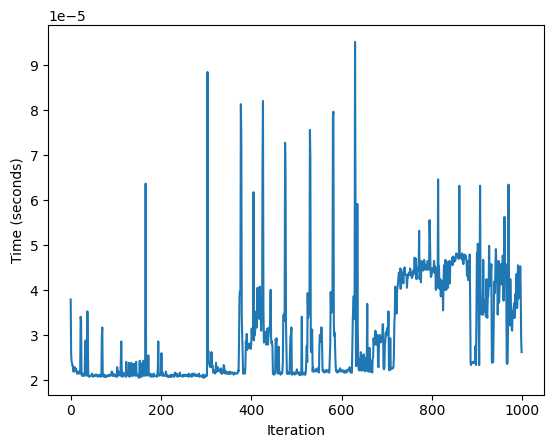

In [90]:
message_short = read_file("huffman_message_short.txt")
message_medium = read_file("huffman_message_medium.txt")
message_long = read_file("huffman_message_long.txt")

short_symbol_percentages = sorted(count_symbols(message_short).items(), key=lambda x: x[1], reverse=True)
medium_symbol_percentages = sorted(count_symbols(message_medium).items(), key=lambda x: x[1], reverse=True)
long_symbol_percentages = sorted(count_symbols(message_long).items(), key=lambda x: x[1], reverse=True)

huffman_tree_small = build_huffman_tree(short_symbol_percentages)
huffman_tree_medium = build_huffman_tree(medium_symbol_percentages)
huffman_tree_large = build_huffman_tree(long_symbol_percentages)

tree = HuffmanTree()

small_code_dict = tree.encode(huffman_tree_small)
medium_code_dict = tree.encode(huffman_tree_medium)
large_code_dict = tree.encode(huffman_tree_large)

write_file("encoded_short", message_short, small_code_dict)
write_file("encoded_medium", message_medium, medium_code_dict)
write_file("encoded_long", message_long, large_code_dict)

short_message_to_decode = read_file("encoded_short")
medium_message_to_decode = read_file("encoded_medium")
long_message_to_decode = read_file("encoded_long")

timings = []

for i in range(1000):
    start = time.time()
    tree.encode(huffman_tree_large)
    stop = time.time()
    timings.append(stop - start)

plt.plot(timings)
plt.ylabel('Time (seconds)')
plt.xlabel('Iteration')
plt.show()

# Analyse decoding


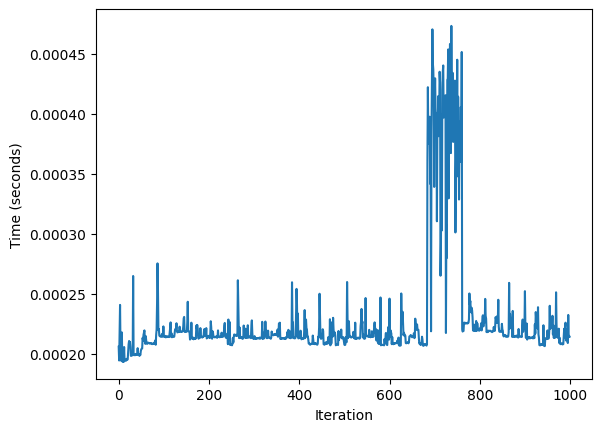

In [91]:
message_short = read_file("huffman_message_short.txt")
message_medium = read_file("huffman_message_medium.txt")
message_long = read_file("huffman_message_long.txt")

short_symbol_percentages = sorted(count_symbols(message_short).items(), key=lambda x: x[1], reverse=True)
medium_symbol_percentages = sorted(count_symbols(message_medium).items(), key=lambda x: x[1], reverse=True)
long_symbol_percentages = sorted(count_symbols(message_long).items(), key=lambda x: x[1], reverse=True)

huffman_tree_small = build_huffman_tree(short_symbol_percentages)
huffman_tree_medium = build_huffman_tree(medium_symbol_percentages)
huffman_tree_large = build_huffman_tree(long_symbol_percentages)

tree = HuffmanTree()

small_code_dict = tree.encode(huffman_tree_small)
medium_code_dict = tree.encode(huffman_tree_medium)
large_code_dict = tree.encode(huffman_tree_large)

write_file("encoded_short", message_short, small_code_dict)
write_file("encoded_medium", message_medium, medium_code_dict)
write_file("encoded_long", message_long, large_code_dict)

short_message_to_decode = read_file("encoded_short")
medium_message_to_decode = read_file("encoded_medium")
long_message_to_decode = read_file("encoded_long")

timings = []

for i in range(1000):
    start = time.time()
    huffman_tree_small.decode(short_message_to_decode, small_code_dict)
    stop = time.time()
    timings.append(stop - start)

plt.plot(timings)
plt.ylabel('Time (seconds)')
plt.xlabel('Iteration')
plt.show()

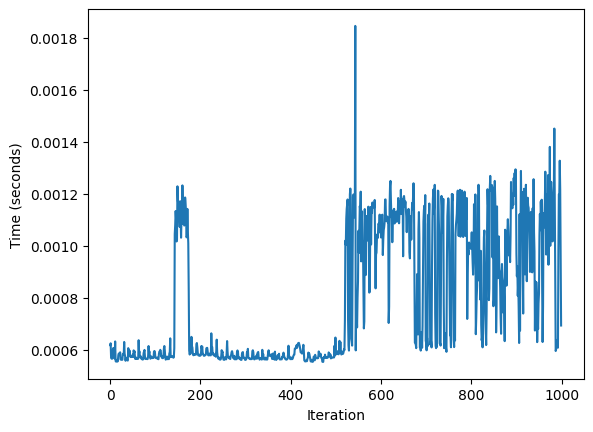

In [92]:
message_short = read_file("huffman_message_short.txt")
message_medium = read_file("huffman_message_medium.txt")
message_long = read_file("huffman_message_long.txt")

short_symbol_percentages = sorted(count_symbols(message_short).items(), key=lambda x: x[1], reverse=True)
medium_symbol_percentages = sorted(count_symbols(message_medium).items(), key=lambda x: x[1], reverse=True)
long_symbol_percentages = sorted(count_symbols(message_long).items(), key=lambda x: x[1], reverse=True)

huffman_tree_small = build_huffman_tree(short_symbol_percentages)
huffman_tree_medium = build_huffman_tree(medium_symbol_percentages)
huffman_tree_large = build_huffman_tree(long_symbol_percentages)

tree = HuffmanTree()

small_code_dict = tree.encode(huffman_tree_small)
medium_code_dict = tree.encode(huffman_tree_medium)
large_code_dict = tree.encode(huffman_tree_large)

write_file("encoded_short", message_short, small_code_dict)
write_file("encoded_medium", message_medium, medium_code_dict)
write_file("encoded_long", message_long, large_code_dict)

short_message_to_decode = read_file("encoded_short")
medium_message_to_decode = read_file("encoded_medium")
long_message_to_decode = read_file("encoded_long")

timings = []

for i in range(1000):
    start = time.time()
    huffman_tree_medium.decode(medium_message_to_decode, medium_code_dict)
    stop = time.time()
    timings.append(stop - start)

plt.plot(timings)
plt.ylabel('Time (seconds)')
plt.xlabel('Iteration')
plt.show()

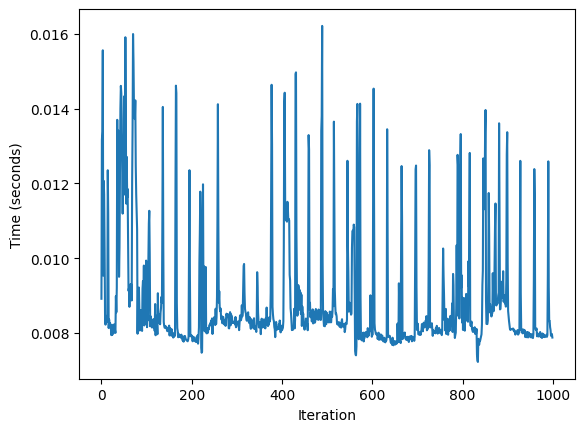

In [93]:
message_short = read_file("huffman_message_short.txt")
message_medium = read_file("huffman_message_medium.txt")
message_long = read_file("huffman_message_long.txt")

short_symbol_percentages = sorted(count_symbols(message_short).items(), key=lambda x: x[1], reverse=True)
medium_symbol_percentages = sorted(count_symbols(message_medium).items(), key=lambda x: x[1], reverse=True)
long_symbol_percentages = sorted(count_symbols(message_long).items(), key=lambda x: x[1], reverse=True)

huffman_tree_small = build_huffman_tree(short_symbol_percentages)
huffman_tree_medium = build_huffman_tree(medium_symbol_percentages)
huffman_tree_large = build_huffman_tree(long_symbol_percentages)

tree = HuffmanTree()

small_code_dict = tree.encode(huffman_tree_small)
medium_code_dict = tree.encode(huffman_tree_medium)
large_code_dict = tree.encode(huffman_tree_large)

write_file("encoded_short", message_short, small_code_dict)
write_file("encoded_medium", message_medium, medium_code_dict)
write_file("encoded_long", message_long, large_code_dict)

short_message_to_decode = read_file("encoded_short")
medium_message_to_decode = read_file("encoded_medium")
long_message_to_decode = read_file("encoded_long")

timings = []

for i in range(1000):
    start = time.time()
    huffman_tree_large.decode(long_message_to_decode, large_code_dict)
    stop = time.time()
    timings.append(stop - start)

plt.plot(timings)
plt.ylabel('Time (seconds)')
plt.xlabel('Iteration')
plt.show()